In [139]:
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_csv('regress.csv')
features.head(5)

,Unnamed: 0,G,GP,M,M/PG,NC-17,Not Yet Rated,PG,PG-13,R,...,War,Western,Musical,News,Opening_Weekend,avg_pos,avg_neg,no_pos_comms,no_neg_comms,budget2
0,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,55761,0.548040,-0.549934,2075,1400,1722
1,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,24120,0.596535,-0.535067,100,30,16985
2,2,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,24727437,0.547978,-0.533019,3084,2080,18063614
3,3,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,22707,0.561408,-0.522725,2244,1224,17358
4,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,3516,0.536705,-0.529111,1475,1415,934


In [140]:
print('The shape of our features is:', features.shape)

The shape of our features is: (1226, 45)


In [141]:
# Descriptive statistics for each column
features.describe()

,Unnamed: 0,G,GP,M,M/PG,NC-17,Not Yet Rated,PG,PG-13,R,...,War,Western,Musical,News,Opening_Weekend,avg_pos,avg_neg,no_pos_comms,no_neg_comms,budget2
count,1226.000000,1226.000000,1226.0,1226.0,1226.0,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,...,1226.000000,1226.000000,1226.000000,1226.000000,1.226000e+03,1225.000000,1221.000000,1226.000000,1226.000000,1.226000e+03
mean,612.500000,0.008972,0.0,0.0,0.0,0.001631,0.007341,0.106852,0.241436,0.311582,...,0.019576,0.004078,0.006525,0.003263,8.662315e+06,0.555707,-0.503006,3832.053834,2093.355628,1.888691e+07
std,354.060023,0.094335,0.0,0.0,0.0,0.040373,0.085399,0.309050,0.428128,0.463329,...,0.138594,0.063757,0.080548,0.057050,2.172673e+07,0.030714,0.045202,3432.140504,1918.941801,4.347713e+07
min,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.394783,-0.932500,0.000000,0.000000,0.000000e+00
25%,306.250000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.995500e+03,0.537735,-0.519845,1481.250000,797.000000,3.663000e+03
50%,612.500000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,5.230750e+04,0.554458,-0.499713,3258.000000,1720.000000,2.502350e+04
75%,918.750000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,7.986288e+06,0.571131,-0.480929,5370.000000,2895.000000,1.276293e+07
max,1225.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2.088063e+08,0.812850,-0.226750,39340.000000,21945.000000,2.600000e+08


In [142]:
features.columns

Index(['Unnamed: 0', 'G', 'GP', 'M', 'M/PG', 'NC-17', 'Not Yet Rated', 'PG',
       'PG-13', 'R', 'Unknown', 'Unrated', 'X', 'averageRating', 'numVotes',
       'runtimeMinutes', 'box office', 'Action', 'Crime', 'Drama', 'Adventure',
       'Romance', 'Comedy', 'Sci-Fi', 'Animation', 'Family', 'Thriller',
       'Horror', 'Mystery', 'Biography', 'History', 'Fantasy', 'Sport',
       'Music', 'Documentary', 'War', 'Western', 'Musical', 'News',
       'Opening_Weekend', 'avg_pos', 'avg_neg', 'no_pos_comms', 'no_neg_comms',
       'budget2'],
      dtype='object')

### Data preprocessing

In [143]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.array(features['box office'])
labels = np.array(features['Opening_Weekend'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('box office', axis = 1)
features= features.drop('Opening_Weekend', axis = 1)
#features= features.drop('Unnamed: 0', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [144]:
# Replace any NaN values in features with zero
from numpy import *
where_are_NaNs = isnan(features)
features[where_are_NaNs] = 0

In [145]:
# Replace any NaN values in labels with zero
from numpy import *
where_are_NaNs = isnan(labels)
labels[where_are_NaNs] = 0

### Split the data

In [146]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [147]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (919, 43)
Training Labels Shape: (919,)
Testing Features Shape: (307, 43)
Testing Labels Shape: (307,)


### Random Forest Regression Model

In [148]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

In [149]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [150]:
# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [134]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 9903550.45 degrees.


In [117]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -inf %.


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [93]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [135]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [136]:
import matplotlib.pyplot as plt
# Print the feature ranking
print("Feature ranking:")

for f in range(train_features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 16 (0.504356)
2. feature 14 (0.130097)
3. feature 20 (0.095432)
4. feature 15 (0.064876)
5. feature 17 (0.040137)
6. feature 0 (0.025822)
7. feature 40 (0.023270)
8. feature 13 (0.020962)
9. feature 39 (0.019133)
10. feature 42 (0.015671)
11. feature 41 (0.014831)
12. feature 22 (0.009084)
13. feature 23 (0.007172)
14. feature 31 (0.005737)
15. feature 18 (0.003214)
16. feature 8 (0.002752)
17. feature 9 (0.002652)
18. feature 27 (0.001938)
19. feature 19 (0.001925)
20. feature 7 (0.001921)
21. feature 25 (0.001860)
22. feature 26 (0.001817)
23. feature 24 (0.001700)
24. feature 37 (0.000940)
25. feature 21 (0.000565)
26. feature 11 (0.000421)
27. feature 28 (0.000372)
28. feature 29 (0.000369)
29. feature 32 (0.000263)
30. feature 36 (0.000185)
31. feature 1 (0.000182)
32. feature 35 (0.000166)
33. feature 33 (0.000078)
34. feature 30 (0.000067)
35. feature 34 (0.000030)
36. feature 6 (0.000000)
37. feature 38 (0.000000)
38. feature 10 (0.000000)
39. featur

In [137]:
feature_list[16]

'box office'

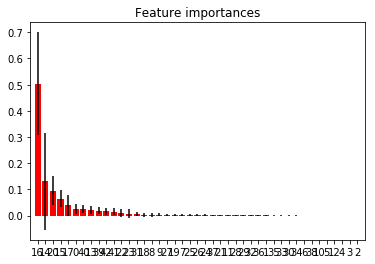

In [138]:

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(train_features.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(train_features.shape[1]), indices)
plt.xlim([-1, train_features.shape[1]])
plt.show()